# Practice Problem: Heat Diffusion in 2D

Study thermal diffusion in 2D using the **Crank-Nicolson method**. Consider the diffusion of a quantity $u(x, y, t)$ over a two-dimensional spatial domain $ x\in = [-L_x,+L_x]$ and $y\in [-L_y,+L_y]$.

The governing equation for this process is the 2D diffusion equation:

$$
\frac{\partial u}{\partial t} = c \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

where $c$ is the diffusion coefficient.

At time $t=0$, the quantity $u(x, y, 0)$ is a **square pulse** centered at the origin $(0,0)$ equal to $1.0$ within the region $[-\frac{L_x}{6}, +\frac{L_x}{6}] \times [-\frac{L_y}{6}, +\frac{L_y}{6}] $ and $0.0$ everywhere else. Implement fixed **Dirichlet** boundary conditions where the value of $u$ is held at $0.0$ along all four edges of the domain for all times.

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt


## Domain definition:

In [2]:
# Define the domain and resolution
Lx = Ly = 1.0
Nx = Ny = 40

# Spatial steps (index i)
delta_x = delta_y = 2*Lx/Nx

# Diffusion coeficient
c = 1.

# Time step
t_sim = 0.1
n_t   = 100
delta_t = t_sim/n_t

#print(delta_t)

### Mesh creation

In [3]:
# 2D axes
x = np.linspace(-Lx, +Lx, Nx)
y = np.linspace(-Ly, +Ly, Ny)

# Meshgrid
x_2d, y_2d = np.meshgrid(x, y)

#print(x_2d.size)

### Initial condition

In [4]:
# Empty array
u = np.zeros((Nx, Ny))

#print(u.shape)
# Add 1's inside the central box
u[Nx //2 - Nx // 6:Nx//2 + Nx // 6, Ny //2 - Ny // 6:Ny//2 + Ny // 6] = 1.


### Plotting the IC:

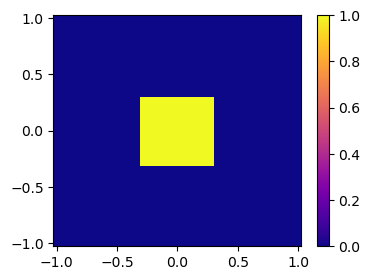

In [5]:
plt.figure(figsize=(4,3))

z_0 = plt.pcolor(x_2d, y_2d, u, cmap = "plasma", clim = (0,1))

plt.colorbar(z_0)

plt.show()

### Numerics:

$\alpha=\frac{c\,\Delta t}{2\,\Delta x^2}$

In [6]:
# Define alpha

alpha = c*delta_t/(2*delta_x**2)

print(-alpha, 1+ 4.*alpha)

-0.19999999999999996 1.7999999999999998


In [7]:
# Flatten the grid
N = Nx*Ny



### LHS of the Crank Nicolson Method:

In [8]:
# Diagonal elements
diag_0 = (1 + 4*alpha)*np.ones(N)
diag_s = -alpha*np.ones(N - 1)
diag_u = -alpha*np.ones(N - Nx)
#print(diag_s.shape)

# For the A matrix (LHS)

a_matrix = np.diag(diag_0)
a_matrix += np.diag(diag_s, k = 1)
a_matrix += np.diag(diag_s, k = -1)
a_matrix += np.diag(diag_u, k = Nx)
a_matrix += np.diag(diag_u, k = -Nx)


In [9]:
#print(a_matrix[4, :])

[0. 0. 0. ... 0. 0. 0.]


In [10]:
# Non-periodic boundary conditions
for i in range(1, Ny):
    # Last element of previous row and first element of current row = 0
    a_matrix[i * Nx - 1, i * Nx] = 0
    a_matrix[i * Nx, i * Nx - 1] = 0

In [11]:
print(a_matrix[3, :])

print(a_matrix[4, :])

[ 0.   0.  -0.2 ...  0.   0.   0. ]
[0. 0. 0. ... 0. 0. 0.]


In [12]:
# Define
b = u.flatten()

#print(b.shape)

# Flattened solution
u_new = np.linalg.solve(a_matrix, b)

print(u_new.shape)

# Reshape solution
u_new = u_new.reshape((Nx, Ny))

print(u_new.shape)

(1600,)
(40, 40)


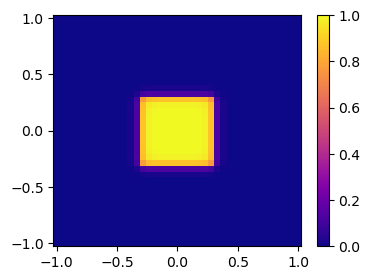

In [13]:
plt.figure(figsize=(4,3))

z_0 = plt.pcolor(x_2d, y_2d, u_new, cmap = "plasma", clim = (0,1))

plt.colorbar(z_0)

plt.show()

### RHS of the Crank-Nicolson method

In [14]:
# Diagonal elements
diag_0 = (1 - 4*alpha)*np.ones(N)
diag_s = alpha*np.ones(N - 1)
diag_u = alpha*np.ones(N - Nx)
#print(diag_s.shape)

# For the A matrix (LHS)

b_matrix = np.diag(diag_0)
b_matrix += np.diag(diag_s, k = 1)
b_matrix += np.diag(diag_s, k = -1)
b_matrix += np.diag(diag_u, k = Nx)
b_matrix += np.diag(diag_u, k = -Nx)

print(b_matrix)

[[0.2 0.2 0.  ... 0.  0.  0. ]
 [0.2 0.2 0.2 ... 0.  0.  0. ]
 [0.  0.2 0.2 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.2 0.2 0. ]
 [0.  0.  0.  ... 0.2 0.2 0.2]
 [0.  0.  0.  ... 0.  0.2 0.2]]


In [15]:
for i in range(1, Ny):
    b_matrix[i * Nx - 1, i * Nx] = 0
    b_matrix[i * Nx, i * Nx - 1] = 0

In [16]:
# Define b using the explicit step
b = b_matrix @ u.flatten()

# Flattened solution
u_new = np.linalg.solve(a_matrix, b)

print(u_new.shape)

# Reshape solution
u_new = u_new.reshape((Nx, Ny))

print(u_new.shape)

(1600,)
(40, 40)


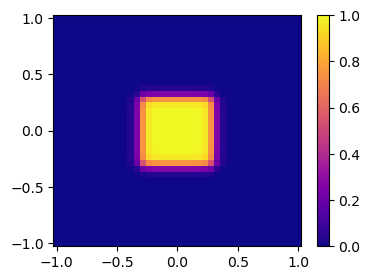

In [17]:
plt.figure(figsize=(4,3))

z_0 = plt.pcolor(x_2d, y_2d, u_new, cmap = "plasma", clim = (0,1))

plt.colorbar(z_0)

plt.show()

### Time evolution loop


In [18]:
# Empty 3D array (t,y,x)

macro_arr = np.zeros((n_t, Ny, Nx))

print(macro_arr.shape)

macro_arr[0, :, : ] = u

(100, 40, 40)


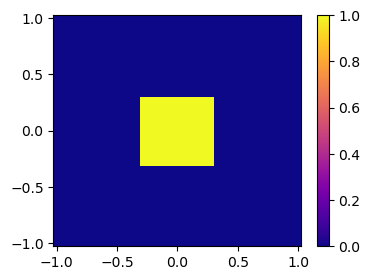

In [19]:
plt.figure(figsize=(4,3))

z_0 = plt.pcolor(x_2d, y_2d, macro_arr[0, :, : ], cmap = "plasma", clim = (0,1))

plt.colorbar(z_0)

plt.show()

In [20]:
# Make a copy of the initial condition
u_new = u.copy()

# For loop in time
for n in range(n_t - 1):
    #print(n)

    # Define b using the explicit step - RHS
    b = b_matrix @ u_new.flatten()
    
    # Flattened solution - LHS
    u_new = np.linalg.solve(a_matrix, b)
    
    #print(u_new.shape)
    
    # Reshape solution
    u_new = u_new.reshape((Nx, Ny))
    
    #print(u_new.shape)

    macro_arr[n + 1, :, :] = u_new.copy()

    

In [21]:
plt.figure(figsize=(4,3))

for k in range(n_t):
    z_0 = plt.pcolor(x_2d, y_2d, macro_arr[k, :, : ], cmap = "plasma", clim = (0,1))

    plt.colorbar(z_0, shrink=0.6, pad=0.1)

    plt.savefig(f"dif2d{k:03d}.png", bbox_inches='tight', pad_inches=0)
    plt.close()

In [22]:
!pwd

/Users/wbandabarragan/Library/CloudStorage/Dropbox/GitHub_Repos/computational-physics-2/unit-5


In [23]:
!ls -ltr *.png


-rw-r--r--@ 1 wbandabarragan  staff   9181 May 27 14:43 dif2d000.png
-rw-r--r--@ 1 wbandabarragan  staff  15326 May 27 14:43 dif2d001.png
-rw-r--r--@ 1 wbandabarragan  staff  15716 May 27 14:43 dif2d002.png
-rw-r--r--@ 1 wbandabarragan  staff  16062 May 27 14:43 dif2d003.png
-rw-r--r--@ 1 wbandabarragan  staff  16165 May 27 14:43 dif2d004.png
-rw-r--r--@ 1 wbandabarragan  staff  16288 May 27 14:43 dif2d005.png
-rw-r--r--@ 1 wbandabarragan  staff  16419 May 27 14:43 dif2d006.png
-rw-r--r--@ 1 wbandabarragan  staff  16508 May 27 14:43 dif2d007.png
-rw-r--r--@ 1 wbandabarragan  staff  16730 May 27 14:43 dif2d008.png
-rw-r--r--@ 1 wbandabarragan  staff  16894 May 27 14:43 dif2d009.png
-rw-r--r--@ 1 wbandabarragan  staff  16874 May 27 14:43 dif2d010.png
-rw-r--r--@ 1 wbandabarragan  staff  17024 May 27 14:43 dif2d011.png
-rw-r--r--@ 1 wbandabarragan  staff  17085 May 27 14:43 dif2d012.png
-rw-r--r--@ 1 wbandabarragan  staff  17179 May 27 14:43 dif2d013.png
-rw-r--r--@ 1 wbandabarragan  staf